In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

<h1 style="color: blue;"># 나. 데이터 종류에 따른 분석 방법</h1>

## 1. 수치형 데이터
+ 중심 경향성: 평균, 중앙값, 최빈값
+ 분산 경향성: 분산, 표준편차, 범위
+ 분포 형태: 히슽그램, 밀드 그래프, Q-Q 플롯
+ 상관관계: 상관부넉, 회귀분석

## 2. 범주형 데이터
+ 빈도수: 도수분포표, 막대그래프, 파이차트
+ 비율: 상대도수, 백분율, 스태킹바그래프
+ 독립성 검정: 카이제곱 검정

## 3. 순서형 데이터
+ 중심 경향성: 중앙값, 백분위수
+ 분산 경향성: 범위, 사분위간 범위
+ 분포 형태: 상자그림, 밀도그래프
+ 비모수 검정: 윌콕슨 순위합 검정

## 4. 시계열 데이터
+ 시계열 분해: 추세, 계절성, 불규칙성 요인 분리
+ 자기상관 분석: 자기상관 함수(ACF), 부분 자기상관 함수(PACF) 분석
+ 시계열 예측: 회귀분석, ARIMA 모형, Prophet 모형등

## 5. 공간 데이터
+ 지리정보시각화:지도시각화,히트맵,등치선
+ 공간 상의 관계 분석 : 공간 자기상관 함수(SGCF)
+ 모라노 지수(Moran’s l), 지역 클러스터 분석 등

## 6. 텍스트 데이터
+ 전처리 : 토큰화, 불용어 처리, 정규화
+ 단어 임베딩 : Word2Vec, GloVe
+ 분류 : Naïve Bayes, SVM, 딥러닝 기반 분류

## 7. 이미지 데이터
+ 특징추출:히스토그램,엣지추출컬러 히스토그램
+ 분류 : 로지스틱 회귀, SVM, 신경망
+ 객체 검출 : Haar Cascade, HOG 기술 등

## 1. 수치형 데이터에서의 Q-Q플롯

두 개의 데이터 분포가 서로 얼마나 유사한지를 시각적으로 비교하는 그래프입니다.

Q-Q 플롯에서 Q는 quantile(분위수)을 의미하며, 분석하고자 하는 데이터 분포와 비교 대상인 기준 분포의 분위수 값을 서로 대응시켜 그립니다.

     survived  pclass     sex   age  sibsp  parch     fare embarked   class   
0           0       3    male  22.0      1      0   7.2500        S   Third  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

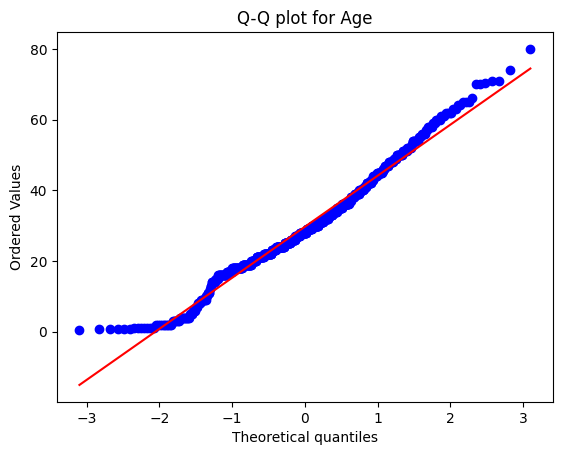

In [10]:
#load data
titanic = sns.load_dataset('titanic')
print(titanic)

#create Q-Q plot for age
stats.probplot(titanic['age'].dropna(), dist='norm', plot=plt)
plt.title('Q-Q plot for Age')
plt.show()

## 2. 범주형 데이터 도수분포표

범주형 데이터의 도수분포표는 각 범주(카테고리)에 대한 빈도수(frequency)를 나타내는 표입니다. 범주형 데이터는 명목형과 순서형 데이터로 구분됩니다. 명목형 데이터의 경우에는 각 범주에 이름이 있으나 서열 이나 계층이 없는 데이터이며, 순서형 데이터의 경우에는 범주들 사이에 서열이나 계층이 있습니다.

## 3-1. 순서형 데이터 분산 경향성

### *백분위수*

전체 데이터 중 특정 백분율 이하의 값과 특정 백분율 이상의 값으로 데이터를 분리하는 기준값을 말합니다. 예를 들어, 50백분위수는 전체 데이터 중 중앙값(median)으로, 25백분위수는 전체 데이터 중 25% 지점의 값, 75백분위수는 전체 데이터 중 75% 지점의 값으로 정의됩니다.

### *사분위간 범위*

사분위수란 데이터를 크기순으로 정렬한 후, 1/4씩 쪼개어 각 부분의 값을 말합니다. 즉, 전체 데이터를 크기순으로 정렬하면, 25%, 50%, 75%에 해당하는 값을 1사분위수(Q1), 중앙값(Q2), 3사분위수(Q3)로 정의할 수 있습니다.

### *상자그림 - 사분위간 범위 시각화*

상자그림은 데이터의 분위수(사분위수)와 이상치(outliers)를 시각화하여 데이터의 분포 형태를 파악하는 그 래프입니다. 상자 그림에서 상자의 아랫부분은 25% 분위수(Q1)를, 윗부분은 75% 분위수(Q3)를 나타내며, 상 자의 가운데 선은 중앙값(median)을 나타냅니다. 상자 그림의 윗부분과 아랫부분을 연결하는 수염은 최대값 과 최소값이 아닌, 1.5 * IQR (Interquartile Range)을 넘어가는 데이터를 이상치(outliers)로 판단하고, 점으로 나 타냅니다.

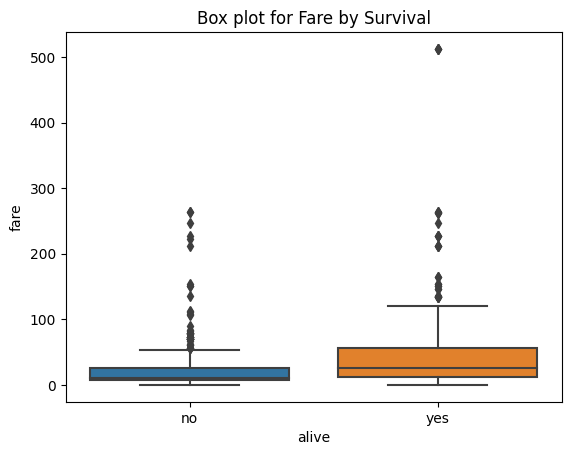

In [11]:
#load titanic dataset
titanic = sns.load_dataset('titanic')

#box plot for fare
sns.boxplot(x='alive', y='fare', data=titanic)
plt.title('Box plot for Fare by Survival')
plt.show()

## 3-2. 순서형 데이터 비모수 검정

### *윌콕슨 순위합 검정*

윌콕슨 순위합 검정은 두 개의 독립된 집단 간의 차이에 대한 검정 방법 중 하나로, 모수적인 가정이 필요없는 비모수 검정 방법입니다. 이 검정 방법은 순서형 데이터(서열 자료)에 대해 사용됩니다.

두 개의 집단을 비교할 때, 두 집단이 서로 독립적인 경우에 사용되며, 등간척도나 비율척도의 데이터가 아닌 경우에도 적용할 수 있습니다. 검정 결과로는 두 집단의 평균이 같은지 아닌지에 대한 정보를 제공합니다.

검정 과정에서는 먼저 각 집단의 순위 합을 구합니다. 이후 두 집단의 순위 합의 차이에 대한 검정을 수행 합니다. 검정 통계량으로는 두 집단의 순위 합의 차이를 이용하며, 윌콕슨 부호 순위 검정(Wilcoxon signed -rank test)이라고도 불립니다.

## 4. 시계열 데이터 자기상관 분석

### *자기상관 함수(ACF)*

시차(lag)에 따른 관측값들 간의 상관관계를 보여줍니다. 시차 0일 때는 자기상관 계수가 1로 나타나 며, 시차가 증가할수록 자기상관 계수가 감소합니다. 시차가 일정 이상일 때 자기상관 계수가 0에 가 까워지면서 관측값 간의 상관관계가 더 이상 없어진다고 판단할 수 있습니다.

### *부분 자기상관함수(PACF)*

부분 자기상관 함수(PACF, Partial Autocorrelation Function)는 ACF와 마찬가지로 자기상관을 파악하기 위한 함수입니다. 그러나, PACF는 시차가 일정 이상일 때 자기상관 계수가 0이 되는 것이 아니라, 해 당 시차를 제외한 다른 시차들과의 자기상관 계수를 보여줍니다.

## 5. 공간 데이터 공간 상의 관계 분석

### *공간 자기 상관 함수*

공간 자기상관 함수는 시계열 분석에서 사용되는 자기상관 함수의 개념을 공간 데이터에 적용한 것입니다. 즉, 인접한 공간 단위(예: 지역, 구획 등) 간의 상관 관계를 분석하는 데 사용됩니다. SGCF는 Moran's I와 LISA 분석에 활용됩니다.

### *데이터의 이질성 - 모라노 지수*

모라노 지수는 공간 자료에서의 자기상관 계수입니다. 이 값은 공간 데이터의 이질성(heterogeneity)을 측정 하는 데 사용됩니다.

### *지역 클러스터 분석*

지역 클러스터 분석은 특정 지역 내에서의 클러스터(군집)의 분포를 파악하는 분석 기법입니다. 이는 주로 Moran's I와 같은 지수를 이용하여 지역 간의 상관 관계를 분석한 후, 그 중에서 유의한 지역 간의 패턴을 파 악하는 방법을 사용합니다. 지역 클러스터 분석은 공간적으로 연속적인 패턴 분석에 유용한 방법입니다.

## 6. 텍스트 데이터

### *전처리 - 토큰화, 불용어 처리, 정규화*

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [14]:
nltk.download('punkt')
nltk.download('popular')

[nltk_data] Downloading package punkt to /Users/sang-yun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /Users/sang-
[nltk_data]    |     yun/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /Users/sang-
[nltk_data]    |     yun/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /Users/sang-
[nltk_data]    |     yun/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /Users/sang-
[nltk_data]    |     yun/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /Users/sang-
[nltk_data]    |     yun/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | 

True

In [15]:
#토큰화
text = "I am a student. I am studying computer science."
tokens = word_tokenize(text)
print("토큰화", tokens)

#불용어 처리 (도움되지 않는 단어 삭제)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower if token.lower() not in stop_words]
print("불용어 처리", filtered_tokens)

#정규화 (단어를 원형으로 돌리는 과정)
stemmer = PorterStemmer()
normalized_tokens = [stemmer.stem(token) for token in filtered_tokens]
print("정규화", normalized_tokens)

토큰화 ['I', 'am', 'a', 'student', '.', 'I', 'am', 'studying', 'computer', 'science', '.']
불용어 처리 ['student', '.', 'studying', 'computer', 'science', '.']
정규화 ['student', '.', 'studi', 'comput', 'scienc', '.']
